In [1]:
import warnings
warnings.filterwarnings("ignore")

# Packages

In [2]:
import os
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import pmdarima as pm
from statsmodels.tsa.arima_model import ARIMA

In [3]:
sns.set(style="whitegrid")

# Load Data

First, we change the directory and read two csv files.

In [4]:
os.chdir('C:/Users/sysux/Desktop/CapitalOne') 

In [5]:
airbnb = pd.read_csv('listings.csv')
zillow = pd.read_csv('Zip_Zhvi_2bedroom.csv')

In [6]:
airbnb_cleaned = airbnb
zillow_cleaned = zillow

# Data Preparation

### Overview

In [7]:
print('Airbnb dataset has %d rows and %d columns' % (airbnb.shape[0], airbnb.shape[1]))

Airbnb dataset has 48895 rows and 106 columns


In [8]:
pd.set_option('display.max_columns', 500)
airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,https://www.airbnb.com/rooms/2539,20190708031610,43655,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,If this room is unavailable on your desired da...,Very close to F and G trains and Express bus i...,NaN,NaN,-The security and comfort of all our guests is...,NaN,NaN,https://a0.muscache.com/im/pictures/3949d073-a...,NaN,2787,https://www.airbnb.com/users/show/2787,John,39698.0,"New York, New York, United States",Educated professional living in Brooklyn. I l...,within an hour,1.00,NaN,f,https://a0.muscache.com/im/pictures/8674565a-7...,https://a0.muscache.com/im/pictures/8674565a-7...,Gravesend,6.0,6.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Brooklyn , NY, United States",Brooklyn,Kensington,Brooklyn,Brooklyn,NY,11218,New York,"Brooklyn , NY",US,United States,40.64749,-73.97237,f,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",NaN,149,299.0,999.0,100.0,25.0,1,35,1,730,1,1,730,730,1.0,730.0,3 weeks ago,t,30,60,90,365,43655,9,2,42342.0,43392.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,moderate,f,f,6,0,5,1,0.21
1,2595,https://www.airbnb.com/rooms/2595,20190708031610,43655,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,NaN,Apartment is located on 37th Street between 5t...,"Guests have full access to the kitchen, bathro...",I am a Sound Therapy Practitioner and Kundalin...,"Make yourself at home, respect the space and t...",NaN,NaN,https://a0.muscache.com/im/pictures/f0813a11-4...,NaN,2845,https://www.airbnb.com/users/show/2845,Jennifer,39700.0,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a few hours,0.87,NaN,f,https://a0.muscache.com/im/users/2845/profile_...,https://a0.muscache.com/im/users/2845/profile_...,Midtown,5.0,5.0,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,t,"New York, NY, United States",Manhattan,Midtown,Manhattan,New York,NY,100

In [9]:
print('Zillow dataset has %d rows and %d columns' % (zillow.shape[0], zillow.shape[1]))

Zillow dataset has 8946 rows and 262 columns


In [10]:
zillow.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,798600.0,798800.0,801500.0,804600.0,814900.0,828300.0,835700.0,849300.0,858100.0,854000.0,834800.0,821700.0,830300.0,853700.0,868300.0,875200.0,882200.0,892400.0,905000.0,924000.0,934400.0,932100.0,927500.0,923600.0,907900.0,890900.0,883400.0,896100.0,923900.0,952900.0,964600.0,972500.0,973800.0,973400.0,966500.0,966800.0,967100.0,974800.0,976800.0,976100.0,973700.0,974500.0,973200.0,966400.0,950400.0,933300.0,920900.0,909400.0,891400.0,873300.0,858800.0,850200.0,842800.0,834000.0,828800.0,821400.0,813900.0,813300.0,821500.0,831700.0,845100.0,854500.0,858900.0,859200.0,863500.0,876000.0,886100.0,890000.0,894200.0,901800.0,909500.0,913300.0,907400.0,900000.0,897700.0,896300.0,892300.0,890400.0,888600.0,891700.0,899500.0,904400.0,908200.0,914000.0,915100.0,912300.0,914000.0,921100.0,923300.0,917300.0,915000.0,922800.0,929100.0,937700.0,955700.0,974200.0,995500.0,1019500.0,1035100.0,1054900.0,1079900,1092600,1103500,1118800,1139300,1154600,1144100,1120300,1125500,1136000,1135100,1130000,1138200,1153700,1174800,1185400,1188400,1189700,1193700,1199900,1201400,1202600,1214200,1235200,1258000,1287700,1307200,1313900,1317100,1327400,1338800.0,1350400.0,1356600.0,1358500.0,1364000,1373300,1382600,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
1,84654,60657,Chicago,IL,Chicago,Cook,2,167700.0,166400.0,166700.0,167200.0,166900.0,166900.0,168000.0,170100.0,171700.0,173000.0,17460

### Airbnb - Data Filtering and Transformation

As the real estate company want to understand which zip codes would generate the most profit on short term rentals, we focus on the breakeven period year and the number of properties available as metrics to evaluate each zipcode. Breakeven period year evaluates how much profit properties in a zipcode can generate and the number of properties evaluates how much properties for the company to choose. The more properties there are, the more flexible the company can choose and the eaiser the company can manage.

The breakeven period (year) is calculated by: 

Breakeven Period Year = Property Cost / (Price per Night * 365 * Occupancy)

As we can see in two datasets, we can get the cost and price per night. We need to calculate the occupancy. There are four columns include this information inlcuding 'availability_30','availability_60', 'availability_90', and 'availability_365'.

In [11]:
def correlation_heatmap(df, column_list):
    plt.figure(figsize=(8,6))
    correlation = df[column_list]
    sns.heatmap(correlation.corr(), annot = True)

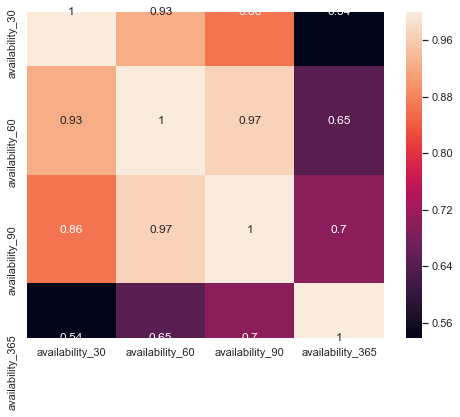

In [12]:
column_list = ['availability_30','availability_60', 'availability_90', 'availability_365']
correlation_heatmap(airbnb, column_list)

By correlation martix map, we find that this four columns are highly correlated with each other. In reality, the number of people who booked the rooms recently are more than those who booked for a long time.Therefore, we choose 'availability_30' to calculate occupancy.

In [13]:
airbnb_cleaned['occupancy'] = 1 - airbnb_cleaned['availability_30'] / 30

In the next step, we need to filter the columns we need to analyze the price for housing.Focusing on short term rentals, we choose price per night as metric to evaluate the price of housing. Realizing that in the 'neighbourhood_group_cleansed' columns, Brooklyn, Manhattan, Queens, The Bronx, and Staten Island all belong to New York City. Therefore, we do not need to filter it by location.

In [14]:
airbnb_cleaned = airbnb_cleaned[['zipcode','accommodates', 'bedrooms', 'price', 'occupancy',
                                 'neighbourhood_group_cleansed', 'square_feet']]

In [15]:
print('Airbnb dataset has %d rows and %d columns' % (airbnb_cleaned.shape[0], airbnb_cleaned.shape[1]))
airbnb_cleaned.head()

Airbnb dataset has 48895 rows and 7 columns


,zipcode,accommodates,bedrooms,price,occupancy,neighbourhood_group_cleansed,square_feet
0,11218,2,1.0,149,0.000000,Brooklyn,NaN
1,10018,2,0.0,225,0.166667,Manhattan,NaN
2,10027,2,1.0,150,0.000000,Manhattan,NaN
3,11238,3,1.0,89,1.000000,Brooklyn,500.0
4,10029,1,NaN,80,1.000000,Manhattan,NaN


### Airbnb - Data Quality Check

#### Missing Values

Getting the data we want, the next step is to check the missing values.

In [16]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("The dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        return mis_val_table_ren_columns

# Credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

In [17]:
missing_value = missing_values_table(airbnb_cleaned)
missing_value

The dataframe has 7 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
square_feet,48487,99.2
zipcode,517,1.1
bedrooms,22,0.0


There is about 1% missing values in zipcode column and only 22 missing values in bedrooms column. Therefore, we decide to drop them.For the square_feet column, the missing value is about 99.2% so we have to drop this column.

In [18]:
# Drop missing values for zipcode and bedrooms columns
airbnb_cleaned.dropna(subset=['zipcode', 'bedrooms'], inplace=True)
airbnb_cleaned.drop(['square_feet'], axis=1, inplace=True)
airbnb_cleaned = airbnb_cleaned[airbnb_cleaned['zipcode'] != 'nan']

We clean the zipcode column including: changing type to string, removing decimal point, slicing first five number in zipcode, and only seleting zipcode in New York City starting with 1.

In [19]:
# Data cleaning for zipcode column
airbnb_cleaned['zipcode'] = airbnb_cleaned['zipcode'].astype(str)
airbnb_cleaned['zipcode'] = airbnb_cleaned['zipcode'].str.split('.').str[0]
airbnb_cleaned = airbnb_cleaned[(airbnb_cleaned['zipcode'].str.len() > 4) & (airbnb_cleaned['zipcode'].str.startswith('1'))]
airbnb_cleaned['zipcode'] = airbnb_cleaned['zipcode'].str.slice(0, 5)
airbnb_cleaned_original = airbnb_cleaned

#### Price Modification

To stick with our goal that investing in two-bedrooms properties, we need to see the distribution of properties across different bedrooms.

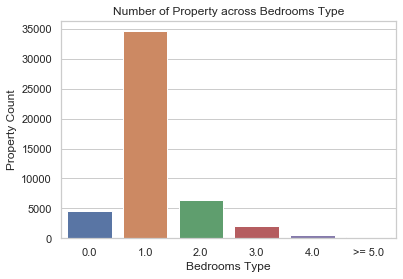

In [20]:
plot_bedrooms_count = airbnb_cleaned.copy()
plot_bedrooms_count.loc[(plot_bedrooms_count.bedrooms >= 5.0),'bedrooms']='>= 5.0'
ax = sns.countplot(x='bedrooms', data=plot_bedrooms_count, order = [0.0, 1.0, 2.0, 3.0, 4.0, '>= 5.0'])
ax.set(xlabel='Bedrooms Type', ylabel='Property Count', title='Number of Property across Bedrooms Type')
plt.show()

In [21]:
all_room_zipcode = airbnb_cleaned['zipcode'].unique()
two_room_zipcode = airbnb_cleaned[airbnb_cleaned['bedrooms'] == 2]['zipcode'].unique()
zipcode_gap = len(list(set(all_room_zipcode) - set(two_room_zipcode)))
print('There are %d zipcodes have no two bedrooms property, which is %%%s of total zipcodes' % 
      (zipcode_gap, round(zipcode_gap / len(all_room_zipcode), 2) * 100))

There are 20 zipcodes have no two bedrooms property, which is %11.0 of total zipcodes


In this step, we find that the number of two bedrooms only accounts for a small number of rooms and there are 20 zipcodes have no two-bedrooms property. To enlarge the sample and cover more zipcodes area for the real estate company to choose, we try to calculate a factorized price using accommodates column for all type of bedrooms. Specifically, we use a factor to modify the price for other bedrooms and make it equivalent to two-bedrooms price. We assume that the more accommodates the room can have, the higher the price is. We only consider bedrooms range from 1 to 4 since the accommodates number is unstable in zero-bedrooms property and the sample of property with larger than five bedrooms is less.

In [22]:
airbnb_cleaned = airbnb_cleaned[(airbnb_cleaned['bedrooms'] > 0) & (airbnb_cleaned['bedrooms'] < 5)]

In [23]:
factorization = airbnb_cleaned.groupby('bedrooms').mean().reset_index()[['bedrooms', 'accommodates', 'price']]
factorization

,bedrooms,accommodates,price
0,1.0,2.243540,117.136048
1,2.0,4.558089,232.614084
2,3.0,6.442383,308.177246
3,4.0,8.073359,472.727799


In [24]:
price_base_factor = factorization[factorization['bedrooms'] == 2.0]['accommodates'].values
factorization['price_factor'] =  factorization['accommodates'] / price_base_factor
factorization[['bedrooms', 'price_factor']]

,bedrooms,price_factor
0,1.0,0.492211
1,2.0,1.000000
2,3.0,1.413396
3,4.0,1.771216


We get different price factors for different bedrooms type, then we can calculate the fatorized price for each bedrooms type.

In [25]:
factor_dict = pd.Series(factorization.price_factor.values,index=factorization.bedrooms).to_dict()
airbnb_cleaned['price_factor'] = airbnb_cleaned['bedrooms'].map(factor_dict)
airbnb_cleaned['modified_price'] = airbnb_cleaned['price'] / airbnb_cleaned['price_factor']

In [26]:
airbnb_cleaned.head()

,zipcode,accommodates,bedrooms,price,occupancy,neighbourhood_group_cleansed,price_factor,modified_price
0,11218,2,1.0,149,0.000000,Brooklyn,0.492211,302.715904
2,10027,2,1.0,150,0.000000,Manhattan,0.492211,304.747554
3,11238,3,1.0,89,1.000000,Brooklyn,0.492211,180.816882
5,10016,2,1.0,200,0.233333,Manhattan,0.492211,406.330072
6,11216,2,1.0,60,1.000000,Brooklyn,0.492211,121.899022


#### Outliers

We look at the distribution of factorized price across different boroughs.

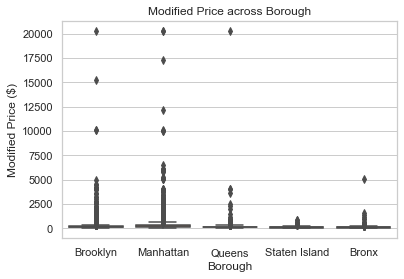

In [71]:
ax = sns.boxplot(x="neighbourhood_group_cleansed", y="modified_price", data=airbnb_cleaned)
ax.set(xlabel='Borough', ylabel='Modified Price ($)', title='Modified Price across Borough')
plt.show()

We find that there are many outliers in each borough. To better estimate the average price in each zipcode, we use the median price in each zipcode to get the rental price per night. Also, we group the data by zipcode and get the property count, average occupancy for each zipcode.

In [28]:
airbnb_cleaned_zipcode = airbnb_cleaned.groupby('zipcode') \
                                       .agg({'accommodates':'size', 'price':'median', 'occupancy':'mean',
                                             'neighbourhood_group_cleansed':pd.Series.mode}) \
                                       .rename(columns={'accommodates':'count'}) \
                                       .reset_index()
airbnb_cleaned_zipcode.sort_values('price', ascending = False).head()

,zipcode,count,price,occupancy,neighbourhood_group_cleansed
47,10281,1,3750.0,0.000000,Manhattan
6,10007,32,354.0,0.888542,Manhattan
45,10270,7,309.0,0.442857,Manhattan
181,11559,1,250.0,0.666667,Queens
14,10017,255,250.0,0.716471,Manhattan


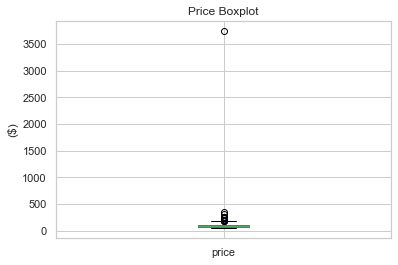

In [29]:
ax = airbnb_cleaned_zipcode.boxplot(column='price')
ax.set(ylabel='($)', title='Price Boxplot')
plt.show()

Now, we get the median price, total properties count, and occupancy for each zipcode. However, we still find one outlier. Zipcode 10281 has only one property and the price is 3750.0. Then, we remove it.

In [30]:
airbnb_cleaned_zipcode.drop( airbnb_cleaned_zipcode[airbnb_cleaned_zipcode['price'] == 3750.0].index , inplace=True)

Then, we get our final Airbnb data.

In [31]:
airbnb_cleaned_zipcode.head()

,zipcode,count,price,occupancy,neighbourhood_group_cleansed
0,10001,390,179.0,0.676068,Manhattan
1,10002,1125,130.0,0.811881,Manhattan
2,10003,887,175.0,0.806238,Manhattan
3,10004,61,139.0,0.709836,Manhattan
4,10005,292,230.0,0.768950,Manhattan


In [32]:
print('Final Airbnb data has %d rows and %d columns' % (airbnb_cleaned_zipcode.shape[0], airbnb_cleaned_zipcode.shape[1]))

Final Airbnb data has 185 rows and 5 columns


### Zillow -  Data Filtering and Transformation

#### Data Filtering

For Zillow data, the first thing we do is filtering the cost in New York City.

In [33]:
def data_filtering(df, state_name, city_name):
    df = df.rename(columns = {'RegionName':'zipcode'})
    df = df[df['State'] == 'NY']
    df = df[df['City'] == 'New York']
    return df

In [34]:
zillow_cleaned = data_filtering(zillow_cleaned, 'NY', 'New York')

In the next step,we only select the most recent three-year cost data to analyze.

In [35]:
useful_columns = zillow_cleaned.columns[zillow_cleaned.columns.to_series().str.contains('zipcode|2013|2014|2015|2016|2017')]
zillow_cleaned = zillow_cleaned[useful_columns]

In [36]:
zillow_cleaned = pd.melt(zillow_cleaned, id_vars=['zipcode'], 
                    value_vars=zillow_cleaned.columns[zillow_cleaned.columns.to_series().str.contains('2013|2014|2015|2016|2017')],
                    var_name='year_month', value_name='cost')

In [37]:
zillow_cleaned['year'] = zillow_cleaned['year_month'].str.split("-", n = 1, expand = True)[0]
zillow_cleaned['month'] = zillow_cleaned['year_month'].str.split("-", n = 1, expand = True)[1]

In [38]:
zillow_cleaned.head()

,zipcode,year_month,cost,year,month
0,10025,2013-01,937700.0,2013,01
1,10023,2013-01,1404700.0,2013,01
2,10128,2013-01,1091600.0,2013,01
3,10011,2013-01,1684600.0,2013,01
4,10003,2013-01,1435300.0,2013,01


In the dataset, we find that for each zipcode, there is a corresponding cost for each month. We choose the median cost of each year to evaluate the expense of property to avoid large outlier values.

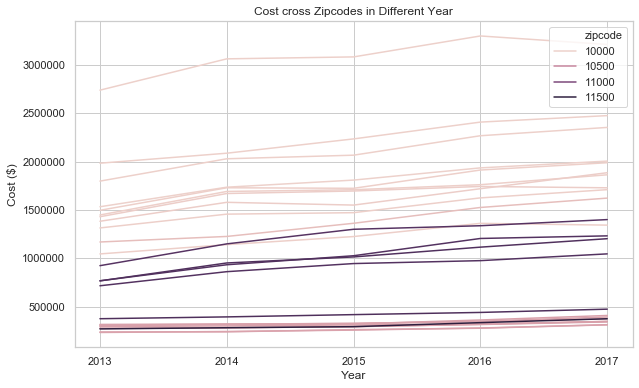

In [39]:
zillow_year_median = zillow_cleaned.groupby(['zipcode','year']).median().reset_index()
plt.figure(figsize=(10,6))
ax = sns.lineplot(x="year", y="cost",hue='zipcode', data=zillow_year_median)
ax.set(xlabel='Year', ylabel='Cost ($)', title='Cost cross Zipcodes in Different Year')
plt.show()

#### Cost Forecasting

We find the there is an increasing trend for the cost. The next step is determing a common unit of time. We find that in the Airbnb dataset, all value in 'scrapy_id' column is 20190708031610. We infer that it means the data is scrappied on 2019-07-08. Therefore, we forecast the current cost (2019-07) in different zipcodes using ARIMA model to get a common unit of time.

In [40]:
def cost_forecast(df, group_name, time_name, forecast_name, end_time):
    zipcode_list = df[group_name].unique()
    zipcode_cost = pd.DataFrame(columns=['current_cost'], index = zipcode_list)
    start_date = pd.to_datetime(df[time_name]).min()
    end_date = pd.to_datetime(df[time_name]).max()
    forecast_end_date = pd.to_datetime(end_time)
    total_step = forecast_end_date.year*12 + forecast_end_date.month - start_date.year*12 - start_date.month
    forecast_step = forecast_end_date.year*12 + forecast_end_date.month - end_date.year*12 - end_date.month
    for zipcode in zipcode_list:
        group = df[df[group_name] == zipcode][[time_name,forecast_name]]
        group = group.set_index(time_name)
        group.index = pd.to_datetime(group.index)
        model = pm.auto_arima(group, start_p=1, start_q=1, start_P=1, start_Q=1,
                     max_p=5, max_q=5, max_P=5, max_Q=5, seasonal=False,
                     stepwise=True, suppress_warnings=True, D=10, max_D=10,
                     error_action='ignore')
        preds, conf_int = model.predict(n_periods=25, return_conf_int=True)        
        zipcode_cost['current_cost'][zipcode] = preds[-1]
    return zipcode_cost.reset_index()

In [41]:
zipcode_cost = cost_forecast(zillow_cleaned, 'zipcode', 'year_month', 'cost', '2019-07')
zipcode_cost['current_cost'] = zipcode_cost['current_cost'].astype(int)

Then, we get our final Zillow data.

In [42]:
zipcode_cost.head()

,index,current_cost
0,10025,1663688
1,10023,2490224
2,10128,2115166
3,10011,2855777
4,10003,2482707


In [43]:
print('Final Zillow data has %d rows and %d columns' % (zipcode_cost.shape[0], zipcode_cost.shape[1]))

Final Zillow data has 25 rows and 2 columns


### Data Merging and Cost Imputation

After cleaning the Airbnb and Zillow datasets, we can merge them together and select the columns we are interested in. One thing catches our attention is that in Airbnb data, there are 185 rows, which means 185 unique zipcodes. However, in Zillow data, there are only 25 rows. The reason is that zipcodes in Zillow dataset do not cover all zipcodes in New York City. Therefore, we try to left join the Airbnb data by Zillow data and find way to impute the NAN values in cost.

In [44]:
zipcode_cost.rename(columns={'index':'zipcode'}, inplace=True)
zipcode_cost['zipcode'] = zipcode_cost['zipcode'].astype(str)

In [45]:
def merging_data(airbnb, zillow):
    airbnb_zillow = airbnb_cleaned_zipcode.merge(zipcode_cost, how = 'left', left_on='zipcode', 
                                                 right_on='zipcode')[['zipcode', 'count', 'price', 'current_cost',
                                                                      'occupancy', 'neighbourhood_group_cleansed']]
    return airbnb_zillow
airbnb_zillow = merging_data(airbnb_cleaned_zipcode, zipcode_cost)

In [46]:
airbnb_zillow.head()

,zipcode,count,price,current_cost,occupancy,neighbourhood_group_cleansed
0,10001,390,179.0,NaN,0.676068,Manhattan
1,10002,1125,130.0,NaN,0.811881,Manhattan
2,10003,887,175.0,2482707.0,0.806238,Manhattan
3,10004,61,139.0,NaN,0.709836,Manhattan
4,10005,292,230.0,NaN,0.768950,Manhattan


To impute the cost, we think that there is not much different inside one borough. And we try to impute the NAN cost by the cost of other zipcodes within the same borough. Therefore, we draw a density plot for cost across different boroughs.

In [47]:
zipcode_cost_area = airbnb_cleaned_zipcode.merge(zipcode_cost, left_on='zipcode', 
                                             right_on='zipcode')[['zipcode', 'count', 'price', 'current_cost','occupancy', 
                                                                  'neighbourhood_group_cleansed']]

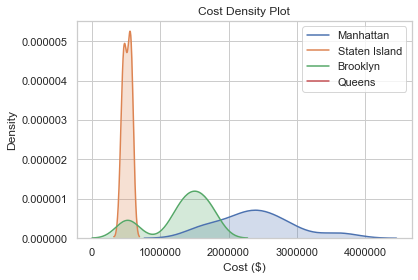

In [48]:
def get_group_density(df, column_name):
    values = df[column_name].unique()
    palette = itertools.cycle(sns.color_palette())
    for value in values:
        temp = df[df[column_name] == value]['current_cost']
        temp = temp.rename(value)
        p1=sns.kdeplot(temp, shade=True, color=next(palette))
    p1.set(xlabel='Cost ($)', ylabel='Density', title='Cost Density Plot')
    plt.show()
get_group_density(zipcode_cost_area, 'neighbourhood_group_cleansed')

From the density plot, we find that the variance of both Manhattan and Brooklyn is so large that if we impute the NAN cost by the mean of median of that borough, it might likely result in error. There is only one data point for Queens so it is also inappropriate to use this only one data to impute. The only thing we can impute is NAN cost in Staten Island because the cost is highly concentrated. It is safe to impute the NAN cost values in Staten Island by the mean cost available in that area.

In [49]:
Staten_Island_cost = zipcode_cost_area.groupby('neighbourhood_group_cleansed').mean()['current_cost']['Staten Island']

Finally, we get the final data for analysis

In [50]:
airbnb_zillow.loc[(airbnb_zillow.neighbourhood_group_cleansed == 'Staten Island'),'current_cost'] = Staten_Island_cost
airbnb_zillow = airbnb_zillow.rename(columns={'neighbourhood_group_cleansed':'borough'})
airbnb_zillow = airbnb_zillow.dropna()
airbnb_zillow.head()

,zipcode,count,price,current_cost,occupancy,borough
2,10003,887,175.0,2482707.0,0.806238,Manhattan
9,10011,649,200.0,2855777.0,0.823369,Manhattan
11,10013,444,171.5,3613811.0,0.728228,Manhattan
12,10014,599,200.0,2838864.0,0.810351,Manhattan
18,10021,239,145.0,2059279.0,0.822455,Manhattan


In [51]:
print('Final cleaned data has %d rows and %d columns' % (airbnb_zillow.shape[0], airbnb_zillow.shape[1]))

Final cleaned data has 29 rows and 6 columns


# Data Analysis

The final cleaned data has 29 rows, which means there are 29 unique zipcodes we can analyze. Our scope and following analysis will focus on these 29 zipcodes.

#### Cost Analysis

First, we look at the current cost across different boroughs. We find that the cost of properties in Manhattan and Brooklyn are high while that in Staten Island and Queens are low.

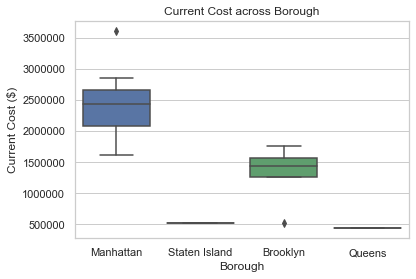

In [52]:
ax = sns.boxplot(x="borough", y="current_cost", data=airbnb_zillow)
ax.set(xlabel='Borough', ylabel='Current Cost ($)', title='Current Cost across Borough')
plt.show()

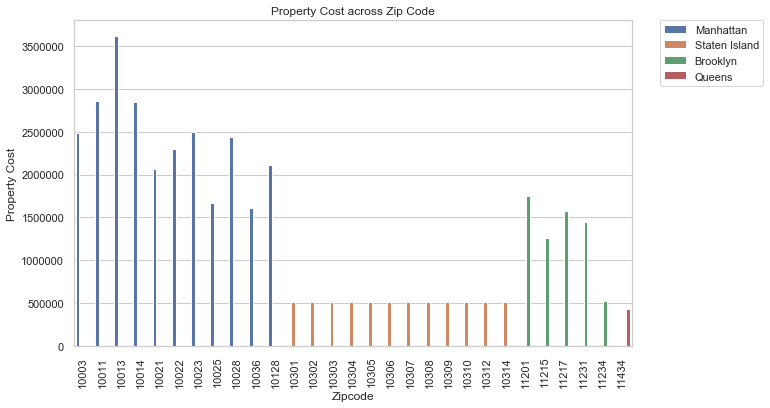

In [53]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="zipcode", y="current_cost", hue="borough", data=airbnb_zillow)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xlabel='Zipcode', ylabel='Property Cost', title='Property Cost across Zip Code')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [54]:
count_map = folium.Map(location=[40.693943, -73.985880])
folium.Choropleth(geo_data="nyc-zip-code-tabulation-areas-polygons.geojson",
             data=airbnb_zillow, # my dataset
             columns=['zipcode', 'current_cost'],
             key_on='feature.properties.postalCode',
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Cost').add_to(count_map)
count_map

# geojson data source: https://github.com/fedhere/PUI2015_EC/blob/master/mam1612_EC/nyc-zip-code-tabulation-areas-polygons.geojson

#### Property Count Analysis

Then, we look at the number of property across different zipcodes. High number of properties means that there are plenties of choice for the company and high activity in Airbnb. It help company to easily arrange the asset and better management.

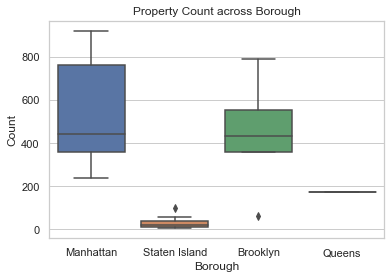

In [55]:
ax = sns.boxplot(x="borough", y="count", data=airbnb_zillow)
ax.set(xlabel='Borough', ylabel='Count', title='Property Count across Borough')
plt.show()

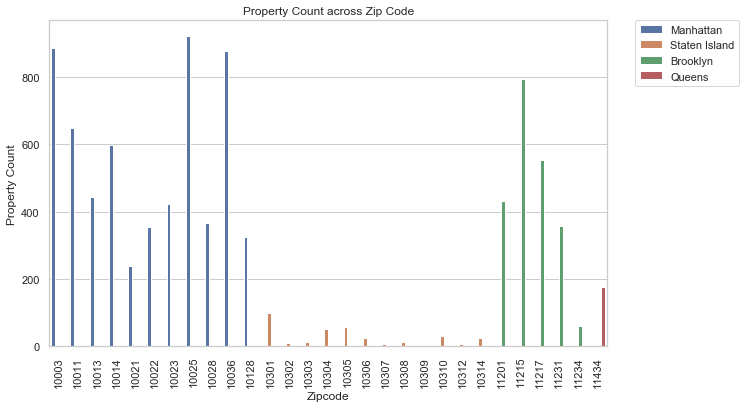

In [56]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="zipcode", y="count", hue="borough", data=airbnb_zillow)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xlabel='Zipcode', ylabel='Property Count', title='Property Count across Zip Code')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [57]:
count_map = folium.Map(location=[40.693943, -73.985880])
folium.Choropleth(geo_data="nyc-zip-code-tabulation-areas-polygons.geojson",
             data=airbnb_zillow, # my dataset
             columns=['zipcode', 'count'],
             key_on='feature.properties.postalCode',
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Count').add_to(count_map)
count_map

# geojson data source: https://github.com/fedhere/PUI2015_EC/blob/master/mam1612_EC/nyc-zip-code-tabulation-areas-polygons.geojson

We find that zipcodes in Manhattan and Brooklyn have most properties. Staten Island covers many properties but the number of them is less. Queens has only one property.

#### Breakeven Period Analysis

In the next step, we calculate the breakeven period (year) of each zip code by current cost, price, and occupancy. Then we try to visualize it in a map.

In [58]:
airbnb_zillow['breakeven_period_year'] = airbnb_zillow['current_cost'] / (airbnb_zillow['price'] * 365 * airbnb_zillow['occupancy'])

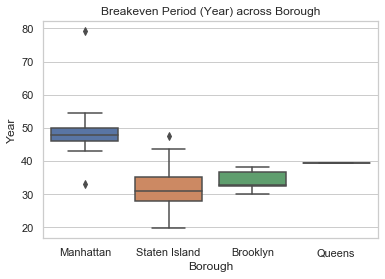

In [59]:
ax = sns.boxplot(x="borough", y="breakeven_period_year", data=airbnb_zillow)
ax.set(xlabel='Borough', ylabel='Year', title='Breakeven Period (Year) across Borough')
plt.show()

In [60]:
count_map = folium.Map(location=[40.693943, -73.985880])
folium.Choropleth(geo_data="nyc-zip-code-tabulation-areas-polygons.geojson",
             data=airbnb_zillow, # my dataset
             columns=['zipcode', 'breakeven_period_year'],
             key_on='feature.properties.postalCode',
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Breakeven Year').add_to(count_map)
count_map

# geojson data source: https://github.com/fedhere/PUI2015_EC/blob/master/mam1612_EC/nyc-zip-code-tabulation-areas-polygons.geojson

In the breakeven period year map, the color represents how many year properties in each zip code need to be breakeven. The shallower the color is, the fewer year need to be breakeven. Zip codes with black color mean that we do not have the data because of the lack of cost data.

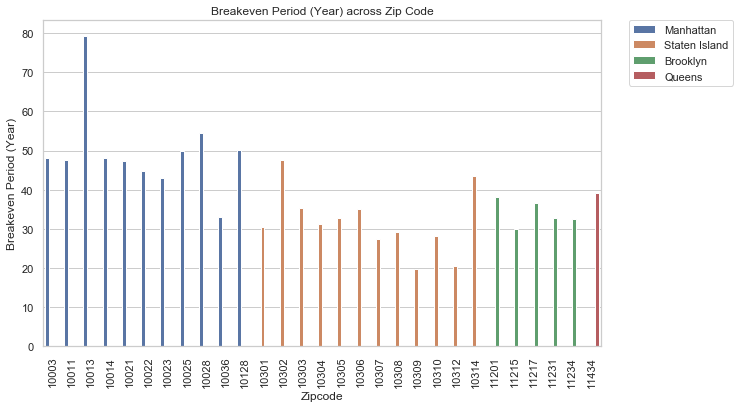

In [61]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="zipcode", y="breakeven_period_year", hue="borough", data=airbnb_zillow)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xlabel='Zipcode', ylabel='Breakeven Period (Year)', title='Breakeven Period (Year) across Zip Code')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

#### Property Count vs Breakeven Period Analysis

We find that the breakeven period (year) of properties in Staten Island are low, those in Brookln are medium, and those in Manhattan are high. Then, we analyze properties in these properties by the two dimensions together. To better visualize the result, we group the zip code by the property count with cutoff 200.

In [62]:
airbnb_zillow.loc[(airbnb_zillow['count'] >= 200),'property_density']='dense'
airbnb_zillow.loc[(airbnb_zillow['count'] < 200),'property_density']='sparse'

In [63]:
airbnb_zillow_dense = airbnb_zillow[airbnb_zillow['property_density'] == 'dense']
airbnb_zillow_sparse = airbnb_zillow[airbnb_zillow['property_density'] == 'sparse']

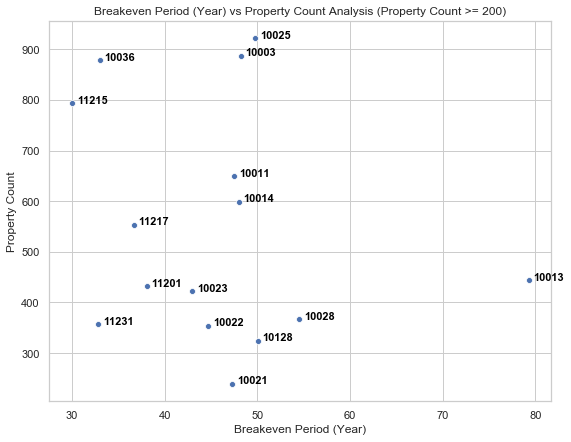

In [64]:
plt.figure(figsize=(9,7))
ax = sns.scatterplot(x="breakeven_period_year", y="count", data=airbnb_zillow_dense)

for line in range(0,airbnb_zillow_dense.shape[0]):
    ax.text(airbnb_zillow_dense.breakeven_period_year.iloc[line]+0.5, airbnb_zillow_dense['count'].iloc[line],
           airbnb_zillow_dense.zipcode.iloc[line], horizontalalignment='left', size=11, color='black', weight='semibold')
    
ax.set(xlabel='Breakeven Period (Year)', ylabel='Property Count', 
       title='Breakeven Period (Year) vs Property Count Analysis (Property Count >= 200)')
plt.show()

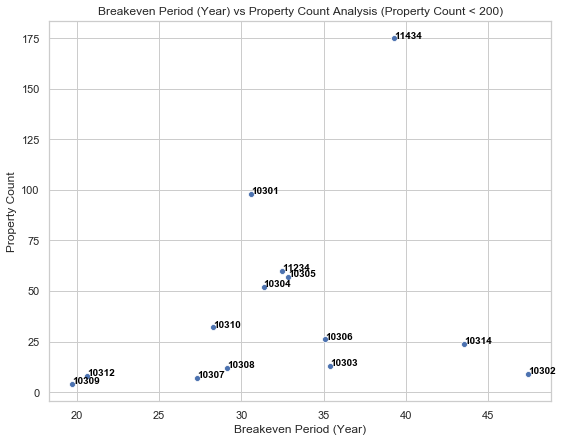

In [65]:
plt.figure(figsize=(9,7))
ax = sns.scatterplot(x="breakeven_period_year", y="count", data=airbnb_zillow_sparse)

for line in range(0,airbnb_zillow_sparse.shape[0]):
    ax.text(airbnb_zillow_sparse.breakeven_period_year.iloc[line], airbnb_zillow_sparse['count'].iloc[line],
           airbnb_zillow_sparse.zipcode.iloc[line], horizontalalignment='left', size=10, color='black', weight='semibold')
    
ax.set(xlabel='Breakeven Period (Year)', ylabel='Property Count', 
       title='Breakeven Period (Year) vs Property Count Analysis (Property Count < 200)')
plt.show()

### Best Time to Invest

In [66]:
zillow_cleaned_list = zillow_cleaned[zillow_cleaned['zipcode'].isin([10309, 10312, 10307, 10308, 10310, 11215, 10036, 10003, 10025])]

In [67]:
zillow_cleaned_list['zipcode'].unique()

array([10025, 10003, 11215, 10036, 10312, 10309, 10308], dtype=int64)

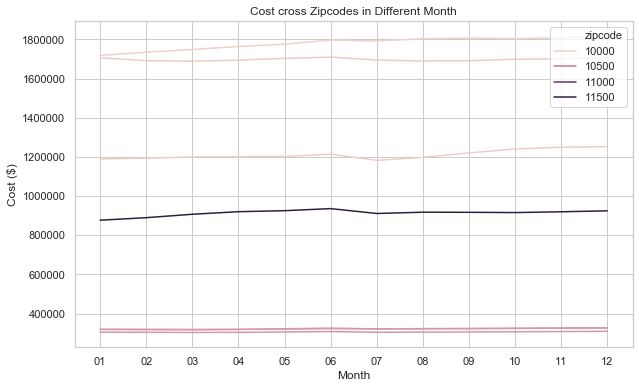

In [68]:
zillow_cleaned_list_month = zillow_cleaned_list.groupby(['zipcode','month']).median().reset_index()
plt.figure(figsize=(10,6))
ax = sns.lineplot(x="month", y="cost",hue='zipcode', data=zillow_cleaned_list_month)
ax.set(xlabel='Month', ylabel='Cost ($)', title='Cost cross Zipcodes in Different Month')
plt.show()

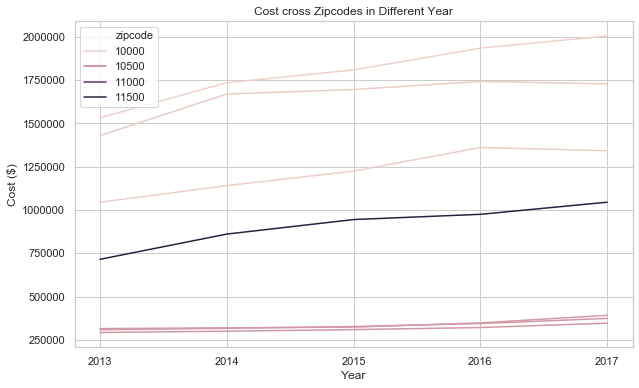

In [69]:
zillow_cleaned_list_month = zillow_cleaned_list.groupby(['zipcode','year']).median().reset_index()
plt.figure(figsize=(10,6))
ax = sns.lineplot(x="year", y="cost",hue='zipcode', data=zillow_cleaned_list_month)
ax.set(xlabel='Year', ylabel='Cost ($)', title='Cost cross Zipcodes in Different Year')
plt.show()